In [5]:
import  numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)

y = np.hstack((y, -y))
x = np.hstack((x, -x))


In [8]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack((y1, -y1))
x1 = np.hstack((x1, -x1))


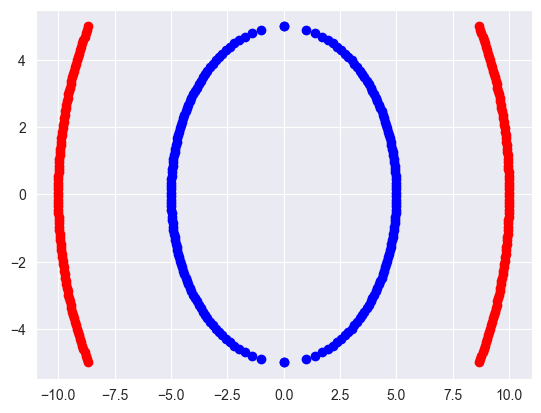

In [14]:
plt.scatter(y, x, color="red")
plt.scatter(y1, x1, color="blue")


In [23]:
import pandas as pd
df1 = pd.DataFrame(np.vstack((x, y)).T, columns=["x1", "x2"])
df1["Y"] = 0
df2 = pd.DataFrame(np.vstack((x1, y1)).T, columns=["x1", "x2"])
df2["Y"] = 1
df = pd.concat([df1, df2])
df.tail()


,x1,x2,Y
195,-4.59596,-1.969049,1
196,-4.69697,-1.714198,1
197,-4.79798,-1.406908,1
198,-4.89899,-0.999949,1
199,-5.00000,-0.000000,1


In [34]:
df["x1_square"] = df['x1']**2
df["x2_square"] = df['x2']**2
df["x1x2"] = (df["x1"] * df["x2"])
df.head()


,x1,x2,Y,x1_square,x2_square,x1x2
0,-5.00000,8.660254,0,25.000000,75.000000,-43.301270
1,-4.89899,8.717792,0,24.000102,75.999898,-42.708375
2,-4.79798,8.773790,0,23.020610,76.979390,-42.096467
3,-4.69697,8.828277,0,22.061524,77.938476,-41.466150
4,-4.59596,8.881281,0,21.122845,78.877155,-40.818009


In [29]:
X = df[["x1", "x2", "x1_square", "x2_square", "x1x2"]]
y = df['Y']

In [39]:
import plotly.express as px
fig = px.scatter_3d(df, x="x1_square", y="x2_square", z="x1x2", color="Y")
fig.show()


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [42]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [43]:
cm

array([[39,  0],
       [ 0, 41]])